<a href="https://cognitiveclass.ai/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork/images/IDSN-logo.png" width="400"> </a>

<h1 align=center><font size = 5>Convolutional Neural Networks with Keras</font></h1>


In this lab, we will learn how to use the Keras library to build convolutional neural networks. We will also use the popular MNIST dataset and we will compare our results to using a conventional neural network.


<h2>Convolutional Neural Networks with Keras</h2>

<h3>Objective for this Notebook<h3>    
<h5> 1. How to use the Keras library to build convolutional neural networks.</h5>
<h5> 2. Convolutional Neural Network with One Convolutional and Pooling Layers.</h5>
<h5> 3. Convolutional Neural Network with Two Convolutional and Pooling Layers.</h5>



## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
      
1. <a href="#item41">Import Keras and Packages</a>   
2. <a href="#item42">Convolutional Neural Network with One Convolutional and Pooling Layers</a>  
3. <a href="#item43">Convolutional Neural Network with Two Convolutional and Pooling Layers</a>  

</font>
</div>


<a id='item41'></a>


## Import Keras and Packages


Let's start by importing the keras libraries and the packages that we would need to build a neural network.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. 
# If you run this notebook on a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.

#!pip install numpy==1.21.4
#!pip install pandas==1.3.4
#!pip install keras==2.1.6

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/fra

When working with convolutional neural networks in particular, we will need additional packages.


In [3]:
from keras.layers.convolutional import Conv2D # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers

In [4]:
# Load the dataset
data = pd.read_csv('https://cocl.us/concrete_data')

# Split the data into predictors (X) and target (y)
X = data.drop('Strength', axis=1)  # Predictors
y = data['Strength']  # Target

# Display the first few rows of the dataset
data.head()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<a id='item42'></a>


## Split the dataset into features X and target Y


In [5]:
# Split the dataset into features (X) and target (y)
X = data.drop('Strength', axis=1)
y = data['Strength']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Define a function to build the Model


In [6]:
def build_model():
    # Initialize the model
    model = Sequential()
    
    # Add a hidden layer with 10 nodes and ReLU activation
    model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
    
    # Add output layer with 1 node (for regression)
    model.add(Dense(1))
    
    # Compile the model using Adam optimizer and mean squared error loss
    model.compile(optimizer=Adam(lr=0.01), loss='mse')
    
    return model


## Train and evaluate the Model Multiple Times

In [7]:
import matplotlib.pyplot as plt

# Initialize list to store mean squared errors and histories
mse_list = []
histories = []

# Repeat the process 50 times
for i in range(50):
    # Split data into training and test sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    
    # Build the model
    model = build_model()
    
    # Train the model on training data for 50 epochs with validation split of 0.2
    history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # Append MSE to the list and save the history
    mse_list.append(mse)
    histories.append(history)
    
    # Print progress
    print(f"Iteration {i + 1}: MSE = {mse:.4f}")


2024-10-04 06:32:51.069722: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2024-10-04 06:32:51.074898: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394290000 Hz
2024-10-04 06:32:51.075453: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x555aa6d66ee0 executing computations on platform Host. Devices:
2024-10-04 06:32:51.075490: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2024-10-04 06:32:51.169576: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

Iteration 1: MSE = 101.5224
Iteration 2: MSE = 129.1358
Iteration 3: MSE = 120.2412
Iteration 4: MSE = 64.2546
Iteration 5: MSE = 68.3037
Iteration 6: MSE = 107.8969
Iteration 7: MSE = 144.6813
Iteration 8: MSE = 93.2916
Iteration 9: MSE = 130.7670
Iteration 10: MSE = 74.2537
Iteration 11: MSE = 127.0272
Iteration 12: MSE = 102.5821
Iteration 13: MSE = 114.9833
Iteration 14: MSE = 56.9348
Iteration 15: MSE = 128.5773
Iteration 16: MSE = 288.3904
Iteration 17: MSE = 105.0941
Iteration 18: MSE = 55.2988
Iteration 19: MSE = 128.0163
Iteration 20: MSE = 152.5681
Iteration 21: MSE = 110.1404
Iteration 22: MSE = 116.0278
Iteration 23: MSE = 72.4745
Iteration 24: MSE = 255.4382
Iteration 25: MSE = 109.3727
Iteration 26: MSE = 146.4557
Iteration 27: MSE = 128.3915
Iteration 28: MSE = 77.7300
Iteration 29: MSE = 104.1001
Iteration 30: MSE = 133.8417
Iteration 31: MSE = 76.9113
Iteration 32: MSE = 104.0966
Iteration 33: MSE = 70.7970
Iteration 34: MSE = 195.2337
Iteration 35: MSE = 118.1875
Iter

Calculate the Mean and Standard Deviation of MSEs

In [8]:
# Calculate mean and standard deviation of MSEs
mse_mean = np.mean(mse_list)
mse_std = np.std(mse_list)

print(f"\nMean of MSEs: {mse_mean:.4f}")
print(f"Standard Deviation of MSEs: {mse_std:.4f}")



Mean of MSEs: 120.7319
Standard Deviation of MSEs: 43.3856


Evaluate the Model

In [9]:
# Evaluate the model performance on the test set
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test MSE Loss: {test_loss}')


Test MSE Loss: 137.32212814775485


------------------------------------------


<a id='item43'></a>


## Vizualize the training process


Let's redefine our convolutional model so that it has two convolutional and pooling layers instead of just one layer of each.


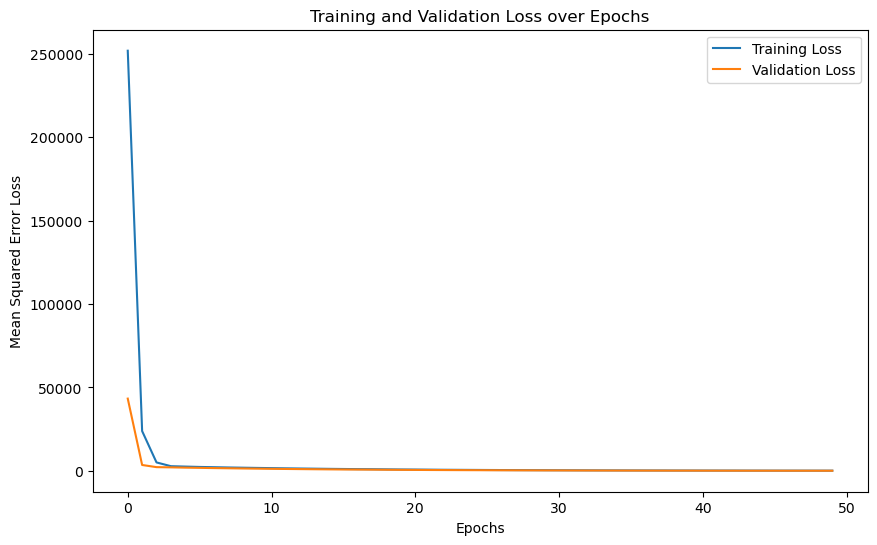

In [10]:
# Plot training and validation loss from the last iteration
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()


Making Predictions

In [11]:
# Make predictions on the test set from the last iteration
y_pred = model.predict(X_test)

# Display first 5 predictions vs actual values
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred.flatten()})
print(comparison.head())


   Actual  Predicted
0   31.25  33.314995
1   38.77  31.137602
2   37.27  31.111975
3   38.61  46.756134
4   26.94  31.031729


### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!



## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-21  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


This notebook is part of a course on **Coursera** called *Introduction to Deep Learning & Neural Networks with Keras*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0101EN_Coursera_Week4_LAB1).


<hr>

Copyright &copy; 2019 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_medium=dswb&utm_source=bducopyrightlink&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01).
